In [2]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [3]:
# Load data
samples = np.load('data/rank_samples.npy')
labels = np.load('data/rank_labels.npy')
print(samples.shape)
print(labels.shape)

(6742, 54, 34)
(6742,)


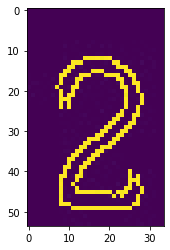

In [4]:
# Visualize a sample
plt.imshow(samples[0])

In [5]:
# Shuffle data
indices = np.arange(samples.shape[0])
np.random.shuffle(indices)
samples = samples[indices]
labels = labels[indices]

In [6]:
# Split data
ratio = 0.9
split = int(samples.shape[0] * ratio)
x_train = samples[:split]
y_train = labels[:split]
x_test = samples[split:]
y_test = labels[split:]

In [7]:
# Choose layers
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(54, 34)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(13)
])

In [8]:
# Choose loss function
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

In [9]:
# Choose optimizer
opt = 'adam'

In [10]:
# Compile model
model.compile(optimizer=opt, loss=loss_fn, metrics=['accuracy'])

In [11]:
# Train model
model.fit(x_train, y_train, epochs=5)

Epoch 1/5
190/190 [==============================] - 1s 3ms/step - loss: 11.1409 - accuracy: 0.8103
Epoch 2/5
190/190 [==============================] - 1s 4ms/step - loss: 0.7576 - accuracy: 0.9529
Epoch 3/5
190/190 [==============================] - 1s 4ms/step - loss: 0.3858 - accuracy: 0.9698
Epoch 4/5
190/190 [==============================] - 1s 4ms/step - loss: 0.2959 - accuracy: 0.9764
Epoch 5/5
190/190 [==============================] - 1s 3ms/step - loss: 0.3016 - accuracy: 0.9789


In [12]:
# Evaluate model
model.evaluate(x_test,  y_test, verbose=2)

22/22 - 0s - loss: 0.7149 - accuracy: 0.9807 - 330ms/epoch - 15ms/step


[0.7149096131324768, 0.9807407259941101]

In [13]:
# Save model
model.save('rank_model')

INFO:tensorflow:Assets written to: rank_model\assets
